# Visualizing with plotly

In this section we will use Plotly to make interactive plots. Please let us know if you have suggestions for new figures that could be made with Plotly.

In [2]:
import numpy as np
import pandas as pd

try:
    import mutagenesis_visualization as mut
except ModuleNotFoundError: # This step is only for when I run the notebooks locally
    import sys
    sys.path.append('../../')
    import mutagenesis_visualization as mut


Load sample datasets.

In [3]:
data_dict = mut.demo_datasets()  # load example datasets
hras_enrichment_GAPGEF = data_dict['array_hras_GAPGEF']
hras_enrichment_RBD = data_dict['array_hras_RBD']

Create objects.

In [5]:
# Load enrichment scores. This is how you would load them from a local file.
hras_enrichment_GAPGEF = np.genfromtxt(
    '../data/HRas166_GAPGEF.csv', delimiter=','
)

hras_enrichment_RBD = np.genfromtxt('../data/HRas166_RBD.csv', delimiter=',')

# Define protein sequence
hras_sequence = 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEY'\
                + 'SAMRDQYMRTGEGFLCVFAINNTKSFEDIHQYREQIKRVKDSDDVPMVLVGNKCDLAARTVES'\
                + 'RQAQDLARSYGIPYIETSAKTRQGVEDAFYTLVREIRQHKLRKLNPPDESGPG'

# Order of amino acid substitutions in the hras_enrichment dataset
aminoacids = list('ACDEFGHIKLMNPQRSTVWY*')

# First residue of the hras_enrichment dataset. Because 1-Met was not mutated, the dataset starts at residue 2
start_position = 2

# Define secondary structure
secondary = [['L0'], ['β1'] * (9 - 1), ['L1'] * (15 - 9), ['α1'] * (25 - 15),
             ['L2'] * (36 - 25), ['β2'] * (46 - 36), ['L3'] * (48 - 46),
             ['β3'] * (58 - 48), ['L4'] * (64 - 58), ['α2'] * (74 - 64),
             ['L5'] * (76 - 74), ['β4'] * (83 - 76), ['L6'] * (86 - 83),
             ['α3'] * (103 - 86), ['L7'] * (110 - 103), ['β5'] * (116 - 110),
             ['L8'] * (126 - 116), ['α4'] * (137 - 126), ['L9'] * (140 - 137),
             ['β6'] * (143 - 140), ['L10'] * (151 - 143), ['α5'] * (172 - 151),
             ['L11'] * (190 - 172)]

# Substitute Nan values with 0
fillna = 0

# Create objects
hras_GAPGEF = mut.Screen(
    hras_enrichment_GAPGEF, hras_sequence, aminoacids, start_position, fillna,
    secondary
)
hras_RBD = mut.Screen(
    hras_enrichment_RBD, hras_sequence, aminoacids, start_position, fillna,
    secondary
)

## Rank

Create an interactive rank figure that displays each mutant.

In [ ]:
hras_RBD.rank_plotly(title='Rank of pointmutants')

Now display the rank of the positional mean.

In [ ]:
hras_RBD.rank_plotly(mode='mean', title='Rank of positions')

## Scatter

If you have two datasets, you can create a scatter plot. The advantage of using plotly over matplotlib is that you can visually check each data point by putting the mouse pointer on top.

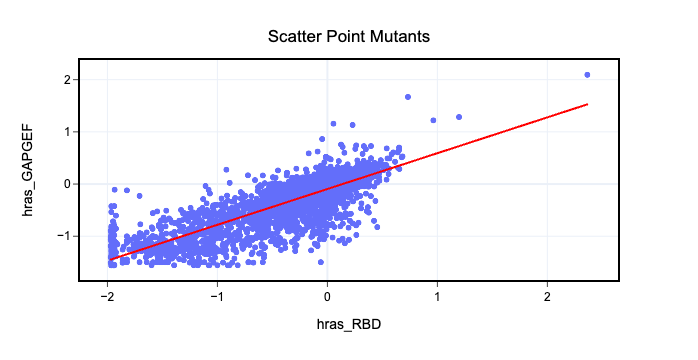

In [10]:
hras_RBD.scatter_plotly(hras_GAPGEF, show_results=False, title='Scatter Point Mutants',
                       x_label = 'hras_RBD', y_label = 'hras_GAPGEF')

Now we just look at the positional average.

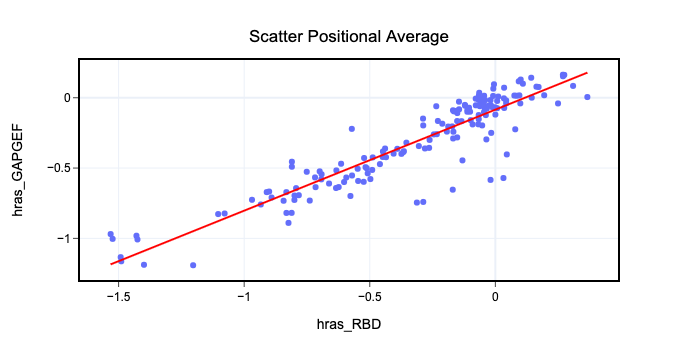

In [11]:
hras_RBD.scatter_plotly(hras_GAPGEF, mode='mean', title='Scatter Positional Average',
                       x_label = 'hras_RBD', y_label = 'hras_GAPGEF')